In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from copy import deepcopy
df = pd.read_csv('../dataSets/training/training_20min_avg_travel_time.csv')

In [2]:
trajectories_train = {}
start_time  = datetime.strptime("2016-07-19 00:00:00",'%Y-%m-%d %H:%M:%S')

for idx in range(df.shape[0]):
    line = df.iloc[idx]
    route = str(line['intersection_id']+str(line['tollgate_id']))
    stime = datetime.strptime(line['time_window'][1:20],'%Y-%m-%d %H:%M:%S')
    day = (stime - start_time).days
    tw_n = (stime.hour * 60 + stime.minute)/20
    
    if route not in trajectories_train.keys():
        trajectories_train[route] = np.zeros(72*91).reshape(91,72)
    trajectories_train[route][day][tw_n] = line['avg_travel_time']

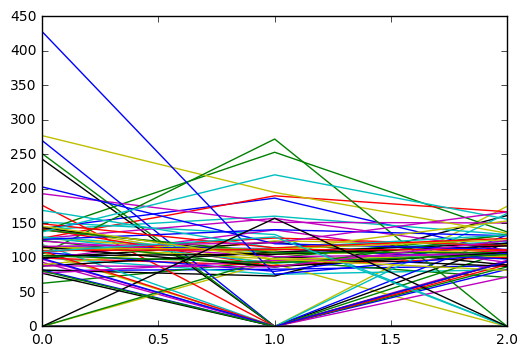

In [67]:
import matplotlib.pyplot as plt
plt.plot(trajectories_train['A3'][1:4,:])
#plt.ylim(0,200)
plt.show()

In [21]:
trajectories_train['A2'][10:30]

array([[  44.38,   41.58,   38.79, ...,   63.08,   44.39,   54.49],
       [   0.  ,    0.  ,  128.28, ...,  174.  ,   80.48,   55.42],
       [  54.47,   53.36,   71.89, ...,   47.82,   51.73,   76.68],
       ..., 
       [  71.62,    0.  ,    0.  , ...,    0.  ,   30.24,   36.41],
       [  35.7 ,   41.91,   74.84, ...,   30.86,   41.91,   32.96],
       [  32.81,   42.14,    0.  , ...,   57.72,    0.  ,    0.  ]])

In [34]:
df_w = pd.read_csv('../dataSets/training/weather_training_update.csv')

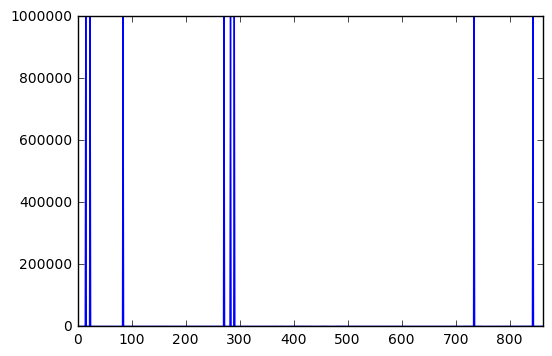

In [49]:
#df_w['pressure'].plot(color='r')
#df_w['sea_pressure'].plot(color='b')
df_w['wind_direction'].plot(color='b')
plt.show()

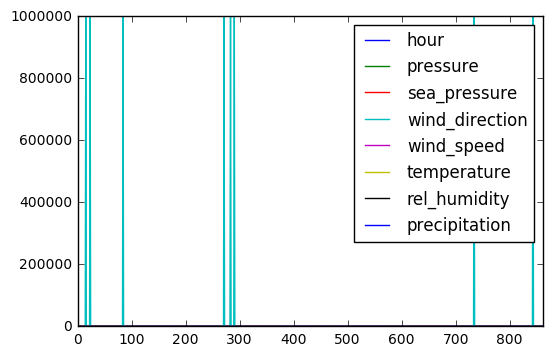

In [47]:
df_w.plot()
plt.show()